Датасет состоит из данных о красных и белых винах Винью Верде с севера Португалии. Цель задачи состоит в том, чтобы определить качество вина(от 0 до 10) на основе физико-химических тестов.

Вино имеет следующие признаки:

1 - Тип вина(type):

2 - Фиксированная кислотность(fixed acidity): большинство кислот, связанных с вином, которые не испаряются быстро

3 - Летучая кислотность(volatile acidity): количество уксусной кислоты в вине, слишком высокое содержание которой может привести к неприятному вкусу уксуса

4 - Лимонная кислота(citric acid): в небольших количествах лимонная кислота может придавать винам «свежесть» и аромат

5 - Остаточный сахар(residual sugar): количество сахара, остающегося после остановки брожения

6 - Хлориды(chlorides): количество соли в вине

7 - Количество диоксида серы свободной формы(free sulfur dioxide): предотвращает рост микробов и окисление вина

8 - Общее количество диоксида серы(total sulfur dioxide): в низких концентрациях SO2 в основном не обнаруживается в вине, но при концентрациях свободного SO2 более 50 частей на миллион SO2 становится заметным в носу и вкусе вина.

9 - Плотность(density)

10 - pH: описывает степень кислотности или щелочности вина по шкале от 0 (очень кислая) до 14 (очень щелочная). У большинства вин уровень pH составляет 3-4.

11 - Сульфаты(sulfates): добавка, которая может способствовать повышению уровня газообразного диоксида серы

12 - Алкоголь(alcohol): процентное содержание алкоголя в вине

13 - Качество вина(quality)

# **1. Загрузка данных**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
      "ds_for_engineers/main/data/wine_quality/winequalityN.csv")

In [4]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# **2. Визуализация данных и вычисление основных характеристик:**

In [5]:
#Информация о количественных признаках:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Минимальное качество вина - 3, а максимальное 9.

Большинство вин имеет качество 5 или 6

In [7]:
data.describe(include = ['object'])

,type
count,6497
unique,2
top,white
freq,4898


В датасете белого вина больше, чем красного

<ipython-input-11-d5b5c596cebe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

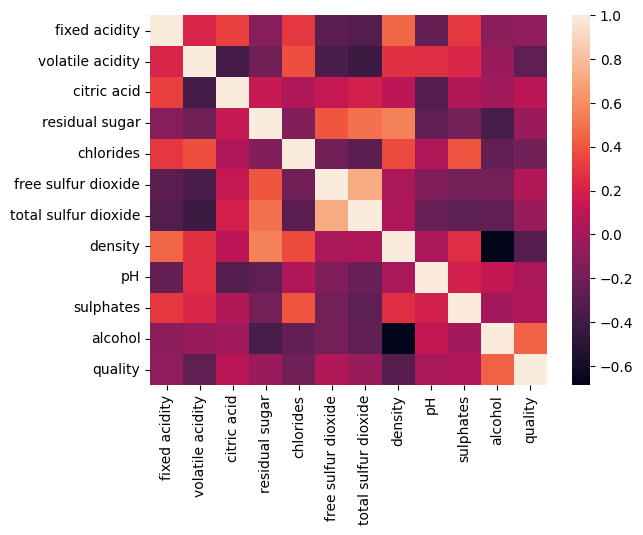

In [11]:
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

целевой признак коррелирует (0.44) с процентным содержанием алкоголя, а также несильная отрицательная корреляция с плотностью, хлоридами и летучей кислотностью.

In [13]:
corr_mat = data.corr(numeric_only=True)
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

free sulfur dioxide  total sulfur dioxide    0.720934
residual sugar       density                 0.552498
dtype: float64

Наблюдается значительная корреляция между количеством SO2 свободной формы и общим количеством SO2, она равна 0.72.

Также есть сильная положительная корреляция между плотностью и остаточным сахаром.

В остальных случаях значительной корреляции между признаками не наблюдается.

In [14]:
corr_mat.where(np.triu(corr_mat < -0.5, k=1)).stack().sort_values(ascending=False)

density  alcohol   -0.686745
dtype: float64

Между признаками процентного содержания алкоголя и плотности есть сильная отрицательная корреляция: -0.69. Это говорит о том, что чем больше содержания алкоголя, тем меньше плотность.

# 3. **Обработатка пропущенных значений**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [17]:
# посмотрим, в каких категориях и сколько есть пропущенных значений
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Пропущенных значений крайне мало, их можно просто удалить, без потери качества

In [23]:
data_not_Nan = (data.dropna()).copy()

In [21]:
data_not_Nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


# **4. Обработатка категориальных признаков**

Бинарный признак 'type' необходимо заменить на числовой.

'white' → 0, 'red'→ 1

In [24]:
data_not_Nan['type'] = pd.factorize(data_not_Nan['type'])[0]
data_not_Nan.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# **5. Нормализация**

так как диапазоны признаков имеют большой разброс, необходимо провести стандартизацию

In [25]:
data_not_Nan_stand = (data_not_Nan.drop(['type', 'quality'], axis=1)).copy() # drop(['type', 'quality']
data_not_Nan_stand = (data_not_Nan_stand - data_not_Nan_stand.mean(axis = 0))/data_not_Nan_stand.std(axis = 0)
data_not_Nan_stand = data_not_Nan_stand.join(data_not_Nan['type'])
data_not_Nan_stand.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6463.000000,6.463000e+03,6.463000e+03,6.463000e+03,6.463000e+03,6463.000000
mean,-1.143377e-16,-2.462658e-16,-8.795206e-17,2.110850e-16,-3.518083e-17,-1.759041e-17,0.000000,5.222594e-14,9.762679e-16,1.583137e-16,-5.453028e-16,0.246480
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.430995
min,-2.633270e+00,-1.576715e+00,-2.194510e+00,-1.018312e+00,-1.341551e+00,-1.662097e+00,-1.940577,-2.528009e+00,-3.101975e+00,-2.089467e+00,-2.089319e+00,0.000000
25%,-6.300537e-01,-6.656323e-01,-4.733664e-01,-7.660440e-01,-5.147708e-01,-7.611355e-01,-0.684534,-7.888463e-01,-6.743362e-01,-6.792513e-01,-8.321195e-01,0.000000
50%,-1.677731e-01,-3.011992e-01,-6.029195e-02,-5.137764e-01,-2.581838e-01,-8.541478e-02,0.040786,6.407665e-02,-5.186461e-02,-1.420263e-01,-1.616132e-01,0.000000
75%,3.715542e-01,3.669283e-01,4.904739e-01,5.583613e-01,2.549901e-01,5.903060e-01,0.713034,7.670717e-01,6.328541e-01,4.623518e-01,6.765196e-01,0.000000
max,6.689389e+00,7.534114e+00,9.233882e+00,1.268823e+01,1.582127e+01,1.455520e+01,5.737206,1.475368e+01,4.927908e+00,9.863789e+00,3.693798e+00,1.000000


# **6. Делю данные на тестовую и обучающую выборки**

In [26]:
X = data_not_Nan_stand
y = data_not_Nan['quality']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 28, stratify = y)

# **7. - 8. Запуск kNN и вычисление ошибок**

In [29]:
param_grid = {
    'algorithm': ('ball_tree', 'kd_tree'),
    'n_neighbors': (22,23, 1),
    'leaf_size': (1,2,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),}

In [30]:
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator = knn,
                    param_grid = param_grid ,
                    scoring = 'accuracy',
                    n_jobs = -1,
                    cv=5, verbose=1)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print("Лучшее количество соседей:", best_n_neighbors)
print(grid.best_params_ )
print("Ошибка кросс-валидации:", best_cv_err)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Лучшее количество соседей: 22
{'algorithm': 'ball_tree', 'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 22, 'p': 1, 'weights': 'distance'}
Ошибка кросс-валидации: 0.34274661508704063


In [31]:
knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, metric='minkowski', n_neighbors=22,
                           p=1, weights='distance').fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test != knn.predict(X_test))

print("Ошибка на обучающей выборке:", err_train)
print("Ошибка на тестовой выборке:", err_test)

Ошибка на обучающей выборке: 0.0
Ошибка на тестовой выборке: 0.3379737045630317


In [32]:
pd.DataFrame(confusion_matrix(y_test, knn.predict(X_test)), index = ['3', '4', '5', '6', '7', '8', '9'],
             columns = ['3', '4', '5', '6', '7', '8', '9'])

,3,4,5,6,7,8,9
3,0,0,3,3,0,0,0
4,0,3,19,20,1,0,0
5,0,0,291,123,12,0,0
6,0,0,91,431,42,0,0
7,0,0,2,95,118,0,0
8,0,0,1,13,11,13,0
9,0,0,0,1,0,0,0


Вывод

Ошибка на тестовой выборке довольно большая (0.3379), это может быть объяснено тем, что качество вина определялось людьми на основе ощущений, а в датасете прсутствуют не все параметры.

На тренировочном сете наблюдается переобучение, причина которого не до конца понятна, поскольку оптимальное количество ближайших соседей составляет 23, и могли бы возникать ошибки. В тоже время, ошибка на тестовой выборке остается достаточно большой.

Из матрицы ошибок видно, что качество 5 довольно часто классифицируется как 6, качество 6 часто классифицируется как 5 и 7, а качество 7 часто классифицируется как 6. Для малых классов (3, 4, 8 и 9) количество ошибок больше, чем количество правильных значений.

На точность классификации могла отрицательно повлиять несбалансированность классов.